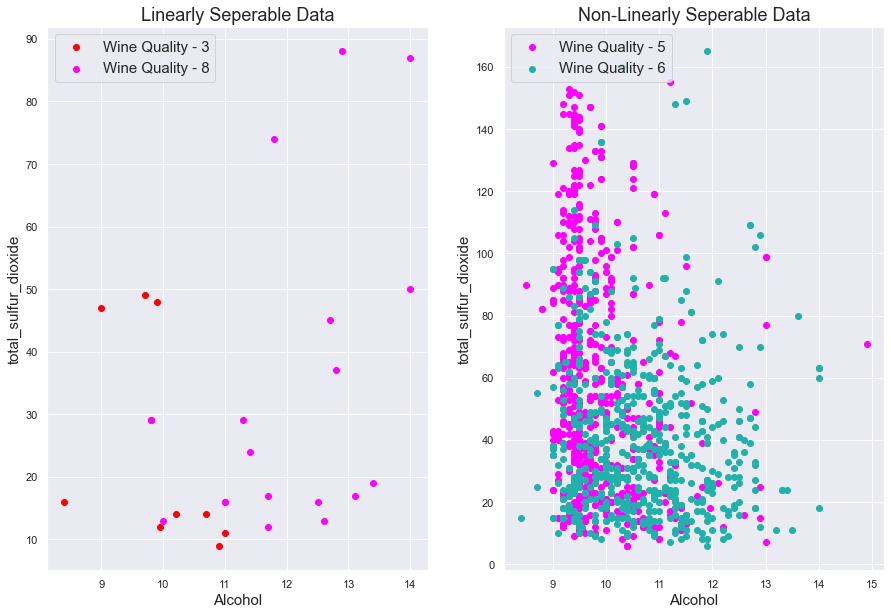

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Import a nice function for plotting decision boudaries
from mlxtend.plotting import plot_decision_regions

# Set the Seaborn theme
sns.set_theme()

# Read the iris dataset into a pandas DataFrame object with seaborn
df = pd.read_csv("Datasets/winequality-red.csv")

three = df[df.quality == 3]
eight = df[df.quality == 8]
five = df[df.quality == 5]
six = df[df.quality == 6]


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

ax1.scatter(three.alcohol, 
            three.total_sulfur_dioxide, 
            color = "red", 
            label = "Wine Quality - 3")
ax1.scatter(eight.alcohol, 
            eight.total_sulfur_dioxide, 
            color = "magenta", 
            label = "Wine Quality - 8")
ax1.set_xlabel("Alcohol", fontsize = 15)
ax1.set_ylabel("total_sulfur_dioxide", fontsize = 15)
ax1.legend(fontsize = 15, loc = "upper left")
ax1.set_title("Linearly Seperable Data", fontsize = 18)


ax2.scatter(five.alcohol, 
            five.total_sulfur_dioxide, 
            color = "magenta", 
            label = "Wine Quality - 5")
ax2.scatter(six.alcohol, 
            six.total_sulfur_dioxide, 
            color = "lightseagreen", 
            label = "Wine Quality - 6")
ax2.set_xlabel("Alcohol", fontsize = 15)
ax2.set_ylabel("total_sulfur_dioxide", fontsize = 15)
ax2.legend(fontsize = 15, loc = "upper left")
ax2.set_title("Non-Linearly Seperable Data", fontsize = 18)
plt.show()



Wine quality 5 and 6 are not linearly separable, but we can see that higher alcohol content increases the probability of quality 6.

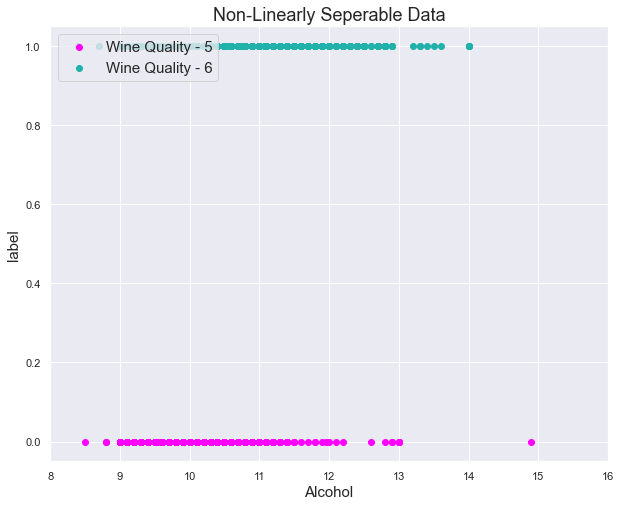

In [15]:
plt.figure(figsize = (10, 8))
plt.xlim((8, 16))
plt.scatter(five.alcohol, 
            np.zeros(681), 
            color = "magenta", 
            label = "Wine Quality - 5")
plt.scatter(six.alcohol, 
            np.ones(638), 
            color = "lightseagreen", 
            label = "Wine Quality - 6")
plt.vlines(4.75, 0.0, 1.0)
plt.xlabel("Alcohol", fontsize = 15)
plt.ylabel("label", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper left")
plt.title("Non-Linearly Seperable Data", fontsize = 18)
plt.show()

Next, we build a single neuron model to predict a class probability. The activation function we use is a sigmoid activaition function.

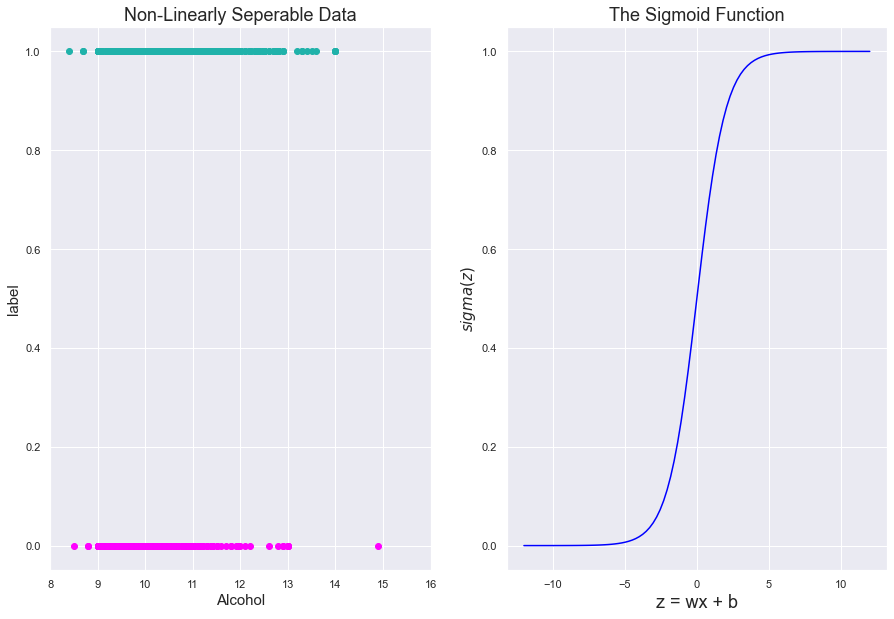

In [16]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

ax1.set_xlim((8, 16))
ax1.scatter(five.alcohol, 
            np.zeros(681), 
            color = "magenta", 
            label = "Wine Quality - 5")
ax1.scatter(six.alcohol, 
            np.ones(638), 
            color = "lightseagreen", 
            label = "Wine Quality -6 ")
ax1.set_xlabel("Alcohol", fontsize = 15)
ax1.set_ylabel("label", fontsize = 15)
ax1.set_title("Non-Linearly Seperable Data", fontsize = 18)


domain = np.linspace(-12.0, 12.0, 100)
ax2.plot(domain, 
        sigmoid(domain), 
        color = "blue", 
        label = "$\sigma$(z)")
ax2.set_xlabel("z = wx + b", fontsize = 18)
ax2.set_ylabel("$sigma(z)$", fontsize = 15)
ax2.set_title("The Sigmoid Function", fontsize = 18)
plt.show()

Next, we define a single neuron model

In [17]:
class SingleNeuron(object):
    """
    A class used to represent a single artificial neuron. 

    ...

    Attributes
    ----------
    activation_function : function
        The activation function applied to the preactivation linear combination.
    
    cost_function : function
        The cost function used to measure model performance.

    w_ : numpy.ndarray
        The weights and bias of the single neuron. The last entry being the bias. 
        This attribute is created when the train method is called.

    errors_: list
        A list containing the mean sqaured error computed after each iteration 
        of stochastic gradient descent per epoch. 

    Methods
    -------
    train(self, X, y, alpha = 0.005, epochs = 50)
        Iterates the stochastic gradient descent algorithm through each sample 
        a total of epochs number of times with learning rate alpha. The data 
        used consists of feature vectors X and associated labels y. 

    predict(self, X)
        Uses the weights and bias, the feature vectors in X, and the 
        activation_function to make a y_hat prediction on each feature vector. 
    """
    def __init__(self, activation_function, cost_function):
        self.activation_function = activation_function
        self.cost_function = cost_function

    def train(self, X, y, alpha = 0.005, epochs = 50):
   
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []
        N = X.shape[0]

        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                self.w_[:-1] -= alpha*(self.predict(xi) - target)*xi
                self.w_[-1] -= alpha*(self.predict(xi) - target)
                #errors += .5*((self.predict(xi) - target)**2)
                errors += self.cost_function(self.predict(xi), target)
            self.errors_.append(errors/N)
        return self

    def predict(self, X):
        preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)


    def plot_cost_function(self):
        fig, axs = plt.subplots(figsize = (10, 8))
        axs.plot(range(1, len(self.errors_) + 1), 
                self.errors_,
                label = "Cost function")
        axs.set_xlabel("epochs", fontsize = 15)
        axs.set_ylabel("Cost", fontsize = 15)
        axs.legend(fontsize = 15)
        axs.set_title("Cost Calculated after Epoch During Training", fontsize = 18)
        plt.show()

    def plot_decision_boundary(self, X, y, xstring="x", ystring="y"):
        plt.figure(figsize = (10, 8))
        plot_decision_regions(X, y, clf = self)
        plt.title("Logistic Regression Neuron Decision Boundary", fontsize = 18)
        plt.xlabel(xstring, fontsize = 15)
        plt.ylabel(ystring, fontsize = 15)
        plt.show()


In [20]:
def cross_entropy_loss(y_hat, y):
    return - y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)

node = SingleNeuron(sigmoid, cross_entropy_loss)

X = df.iloc[63:743].alcohol.values
X = X.reshape(-1, 1)
y = np.where(df.iloc[63:743].quality == 5, 0, 1)

node.train(X, y, alpha = 0.01, epochs = 10_000)

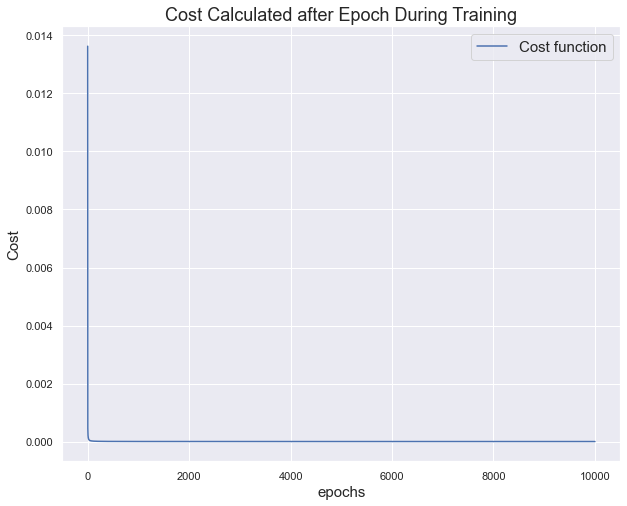

In [21]:

node.plot_cost_function()
plt.show()

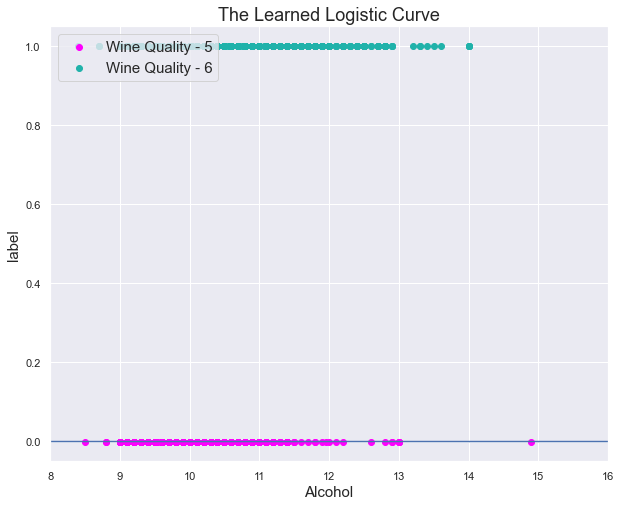

In [23]:
plt.figure(figsize = (10, 8))
plt.xlim((8, 16 ))
plt.scatter(five.alcohol, 
            np.zeros(681), 
            color = "magenta", 
            label = "Wine Quality - 5")
plt.scatter(six.alcohol, 
            np.ones(638), 
            color = "lightseagreen", 
            label = "Wine Quality - 6")

domain = np.linspace(8, 16, 100)
plt.plot(domain, node.predict(domain.reshape(-1, 1)))
plt.xlabel("Alcohol", fontsize = 15)
plt.ylabel("label", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper left")
plt.title("The Learned Logistic Curve", fontsize = 18)
plt.show()

As we can see from above plots, the learned logistic function is not good and has not been able to predict well. Next we check the classification error.

In [25]:

node.predict(X)
np.rint(node.predict(X)) != y

classification_error = (np.rint(node.predict(X)) != y).astype(int)
print(f"Classification Error = {sum(classification_error)/ len(y)}")

Classification Error = 0.0


/Users/arpit/opt/anaconda3/lib/python3.9/site-packages/mlxtend/plotting/decision_regions.py:269: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)


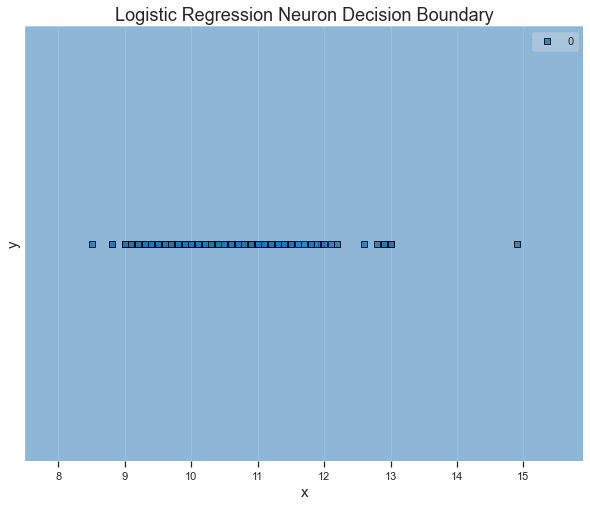

In [26]:
node.plot_decision_boundary(X, y)
plt.show()


Next we check the single neuron model with alcohol and pH as inputs.

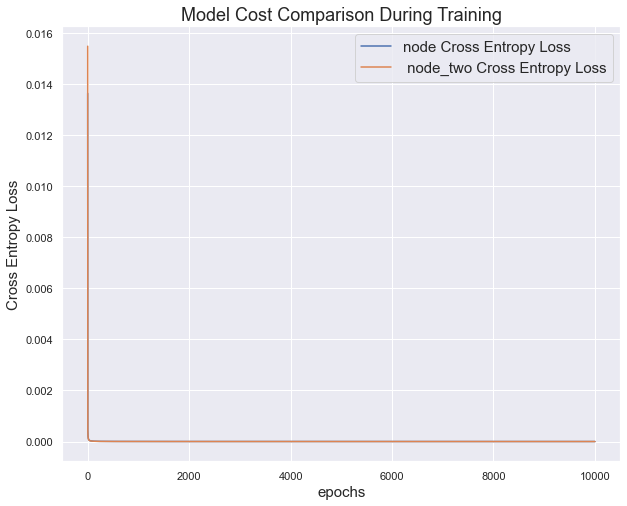

In [27]:
# Instantiate a new single neuron.
node_two = SingleNeuron(sigmoid, cross_entropy_loss)

X_two = df.iloc[63:743][["alcohol", "pH"]].values

# Train the new single neuron model on the new feature vectors.
node_two.train(X_two, y, alpha = 0.01, epochs = 10_000)


plt.figure(figsize = (10, 8))
plt.plot(range(1, len(node.errors_) + 1), 
         node.errors_,
         label = "node Cross Entropy Loss")
plt.plot(range(1, len(node_two.errors_) + 1), 
         node_two.errors_,
         label = " node_two Cross Entropy Loss")
plt.xlabel("epochs", fontsize = 15)
plt.ylabel("Cross Entropy Loss", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("Model Cost Comparison During Training", fontsize = 18)


plt.show()

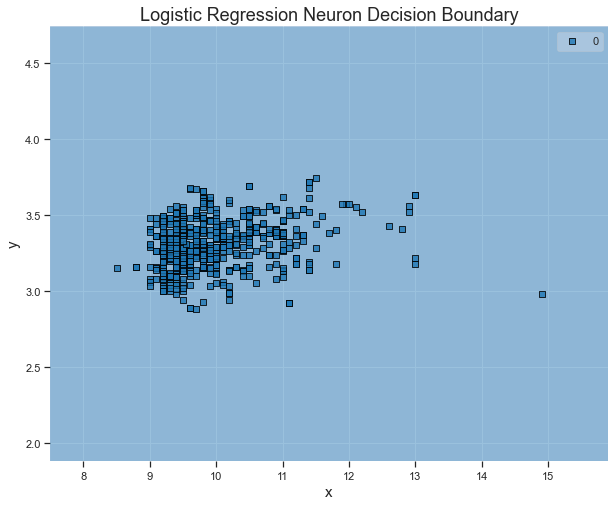

In [28]:
node_two.plot_decision_boundary(X_two, y)


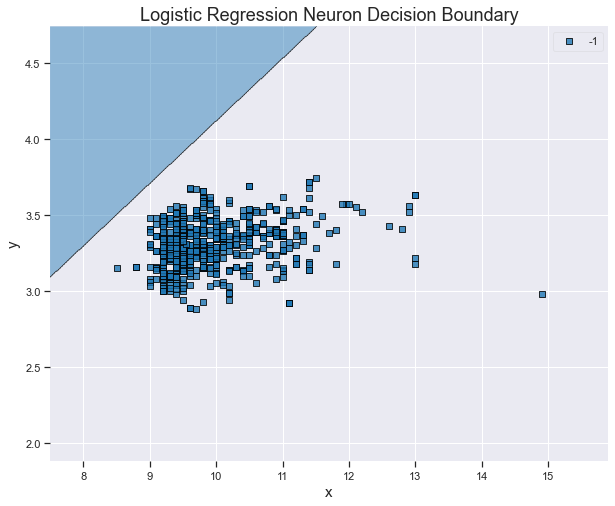

In [29]:
def sign(z):
    return np.sign(z)

def MSE(y_hat, y):
    return .5*(y_hat - y)**2

# Instantiate a new single neuron.
node_three = SingleNeuron(sign, MSE)

# Create a numpy.ndarray of petal length and sepal length values for
# the versicolor and virginica flowers, respectively. 
X_three = df.iloc[63:743][["alcohol", "pH"]].values

y_three = np.where(df.iloc[63:743]["quality"] == 5, -1, 1)


# Train the new single neuron model on the new feature vectors.
node_three.train(X_three, y_three, alpha = 0.001, epochs = 5_000)

node_three.plot_decision_boundary(X_three, y_three)
plt.show()

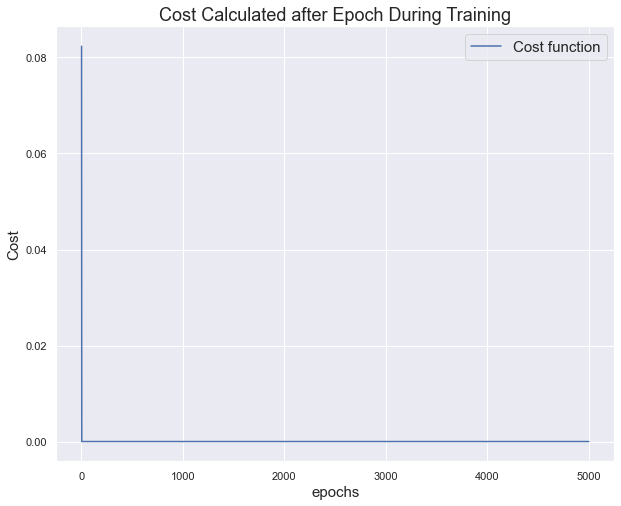

In [30]:
node_three.plot_cost_function()


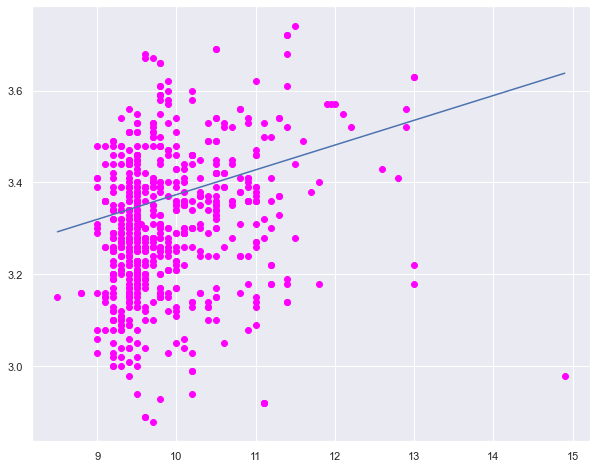

In [31]:
def linear(z):
    return z

# Instantiate a new single neuron.
node_four = SingleNeuron(linear, MSE)

# Create a numpy.ndarray of petal length and sepal length values for
# the versicolor and virginica flowers, respectively. 
X_four = df.iloc[63:743]["alcohol"].values
X_four = X_four.reshape(-1, 1)

y_four = df.iloc[63:743]["pH"].values


# Train the new single neuron model on the new feature vectors.
node_four.train(X_four, y_four, alpha = 0.001, epochs = 5_000)

plt.figure(figsize = (10, 8))
plt.scatter(X_four, y_four, label = "Five", color = "magenta")

domain = np.linspace(np.min(X_four), np.max(X_four), 50)
plt.plot(domain, node_four.predict(domain.reshape(-1, 1)), label = "regression line")
plt.show()
